In [8]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
plt.style.use('ggplot')

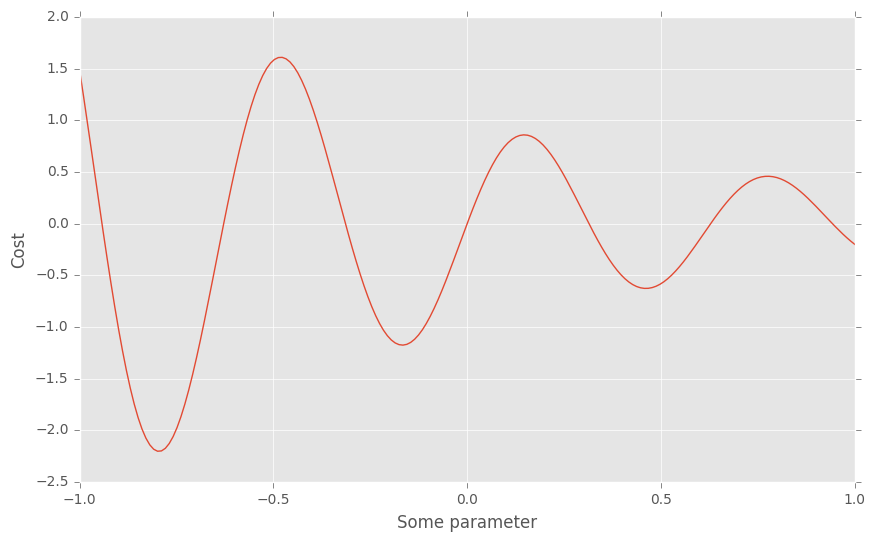

In [9]:
# some cost functions can have local minima

fig = plt.figure(figsize=(10,6))
ax = fig.gca()  #get current axis
x = np.linspace(-1,1,200)
hz = 10
cost = np.sin(hz * x) * np.exp(-x)
ax.set_xlabel('Some parameter')
ax.set_ylabel('Cost')
plt.plot(x, cost)
plt.show()

(199,)
(199,)


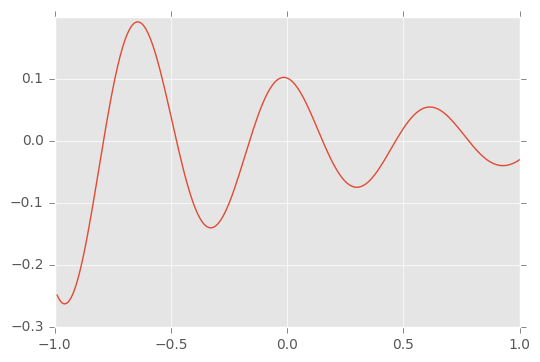

In [21]:
# gradient of cost function at each value of parameter p
gradient = np.diff(cost)

print(x[1:200].shape)
print(gradient.shape)

plt.plot(x[1:200], gradient)

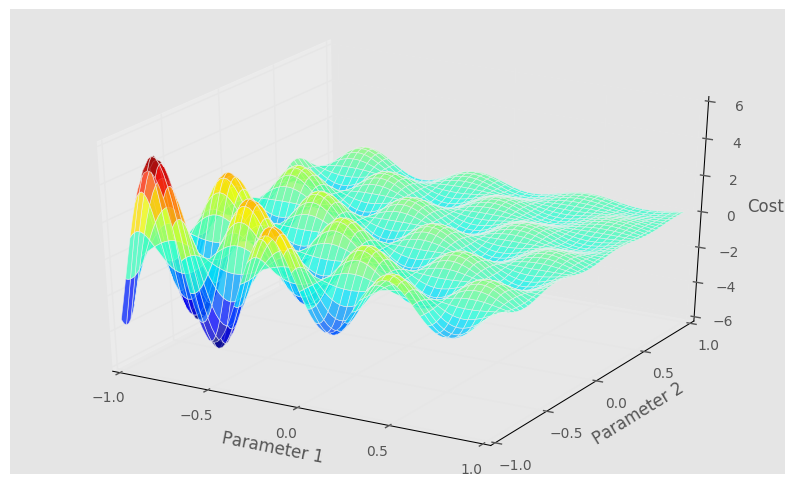

In [38]:
# cost gradient for 2 parameters

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X,Y,Z,rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Parameter 1')
ax.set_ylabel('Parameter 2')
ax.set_zlabel('Cost')


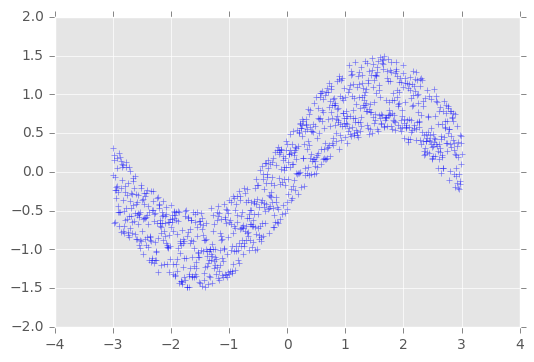

In [40]:
# create a neural network

# create some data
n_observations = 1000
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.5, marker='+')

(array([   6.,   37.,  106.,  182.,  249.,  212.,  121.,   61.,   20.,    6.]),
 array([-2.85277414, -2.2478301 , -1.64288607, -1.03794203, -0.43299799,
         0.17194605,  0.77689009,  1.38183413,  1.98677816,  2.5917222 ,
         3.19666624]),
 <a list of 10 Patch objects>)

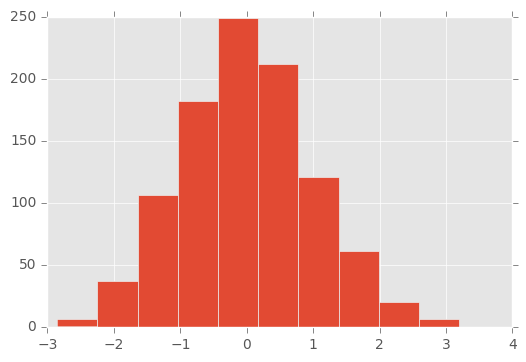

In [42]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

(array([   4.,   17.,   51.,  116.,  218.,  260.,  197.,   95.,   38.,    4.]),
 array([-0.35012761, -0.28466368, -0.21919975, -0.15373583, -0.0882719 ,
        -0.02280797,  0.04265596,  0.10811988,  0.17358381,  0.23904774,
         0.30451167]),
 <a list of 10 Patch objects>)

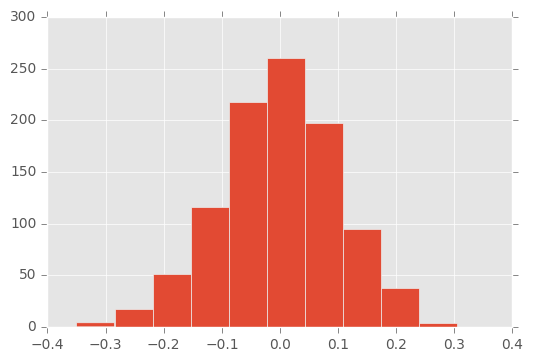

In [44]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [47]:
# define model parameters

W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='Weight')
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='Bias')

y_pred = X * W + B

In [53]:
cost = tf.reduce_mean(tf.abs(y_pred - Y))

In [55]:
# training parameters

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.67108
0.525527
0.456402
0.428981
0.418108
0.414511
0.413118
0.412396
0.412026
0.411896
0.411846
0.411833
0.41182


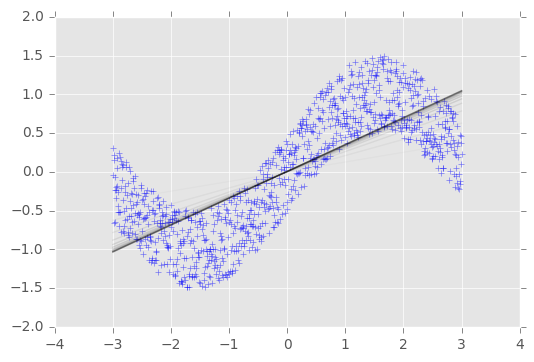

In [59]:
# iteration

n_iterations = 500
fig, ax = plt.subplots(1,1)
plt.scatter(xs, ys, alpha=0.5, marker='+')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y:ys})
        
        if it_i%10 == 0:
            ys_pred = sess.run(y_pred, feed_dict={X: xs})
            
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            fig.show()
            #fig.draw()
            
            print(training_cost)
        
        # if we optimized model params enough, stop iteration
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break
            
        prev_training_cost = training_cost

In [69]:
# mini batch generation

idxs = np.arange(100)
batch_size = 10
n_batches = int(len(idxs) / batch_size)

for i in range(n_batches):
    print(idxs[i * batch_size : (i+1)*batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [73]:
# we need to randomize batch content
# to avoid the nn overfit the order of inputs

rand_idxs = np.random.permutation(idxs)

for i in range(n_batches):
    print(rand_idxs[i*batch_size : (i+1)*batch_size])

[ 8 60 90 13 58  5 89 37 28 19]
[82 78 73 42 31 83 81 71 44 35]
[36 41 72 92 80  0 65 52 97  9]
[10 32  3 66 84 56 98 77 12 70]
[27 74  1 85 68 22 94 75 95 48]
[25 50 55 33 40 16 63 88 96 61]
[59 24 57 87 69 93 14 43 54 86]
[67 18 47 29 51 46 30 62 49 76]
[15 99 17 45 64 79 39 11  6 20]
[23 53 38  2 34  4 21  7 91 26]


0.524365
0.40962
0.39116
0.346761
0.363447
0.43455
0.453727
0.398037
0.44898
0.438723
0.439521
0.391947
0.377006
0.41343
0.378577
0.393792
0.464716
0.397866
0.369201
0.431623
0.394422
0.416319
0.423128
0.430487
0.379932
0.422541
0.435182
0.421306
0.462161
0.489286
0.415674
0.343009
0.440673
0.406172
0.406988
0.431611
0.438884
0.406831
0.395588
0.476487
0.385504
0.42022
0.435761
0.372933
0.428861
0.42399
0.406168
0.437253
0.418098
0.399619


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


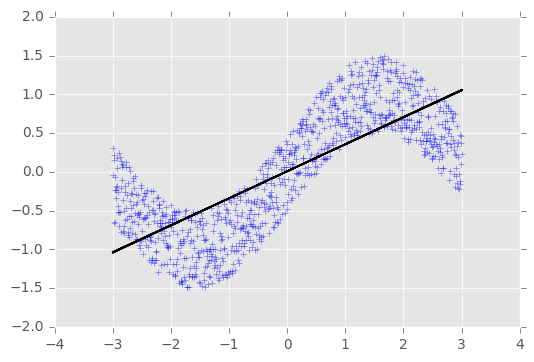

In [79]:
# train nn 

batch_size = 100
fig, ax = plt.subplots(1,1)
ax.scatter(xs, ys, alpha=0.5, marker='+')
ax.set_xlim([-4,4])
ax.set_ylim([-2,2])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i*batch_size : (batch_i+1)*batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
            
        training_cost = sess.run(cost, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        
        if it_i % 10 == 0:
            ys_pred = sess.run(y_pred, feed_dict={X: xs})
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            print(training_cost)

fig.show()

In [89]:
def train(X, Y, y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(tf.abs(y_pred - Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1,1)
    ax.scatter(xs, ys, alpha=0.5, marker='+')
    ax.set_xlim([-4,4])
    ax.set_ylim([-2,2])
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    fig.show()
    plt.draw()

2.70897
2.34533
2.96291
2.72707
2.70684
3.33544
2.79381
3.35528
2.91064
2.76393


/usr/local/lib/python3.4/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


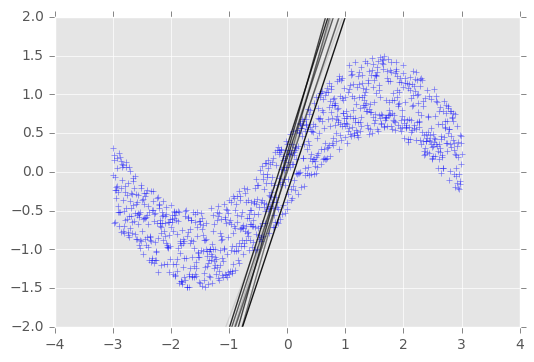

In [90]:
# create the network

n_neurons = 100

W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X, 1), W) + b

y_pred = tf.reduce_sum(h, reduction_indices=1)

train(X, Y, y_pred)

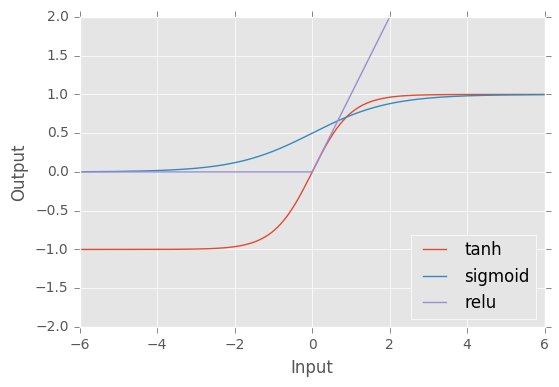

In [102]:
# non-linearities, activation function

sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6,6])
plt.ylim([-2,2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

In [104]:
# create a single layer

def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(tf.constant(0.0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b)
    return h

In [106]:
# explore the graph

from tensorflow.python.framework import ops
ops.reset_default_graph()

# get the current graph
g = tf.get_default_graph()

# list the oprerations in the graph
[op.name for op in g.get_operations()]

# create a network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

[op.name for op in g.get_operations()]


['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'Tanh']

In [109]:
# the names in the graph are not helpful
# we cant distinguish operations in different layers
# we can use scopes to group them

def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or 'linear'):
        W = tf.get_variable(
           name='W',
           shape=[n_input, n_output],
           initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X,W)+b
        if activation is not None:
           h = activation(h)
        return h

In [110]:
# check the generated graph again

# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [111]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b',
 'layer1/b/Initializer/Const',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b',
 'layer2/b/Initializer/Const',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'laye

In [92]:
# Image painting neural network

from scipy.misc import imresize

160


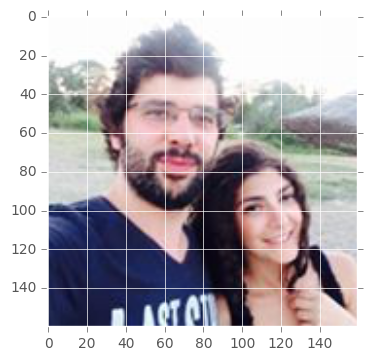

In [98]:
img = plt.imread('ee.jpg')
print(img.shape[0])
plt.imshow(img)

In [100]:
# imput : pixel coordinates
xs = []

# target : pixel color value
ys = []

for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        xs.append([row, col])
        ys.append(img[row, col])
        
#convert lists to array
xs = np.array(xs)
ys = np.array(ys)

# normalize input by mean and std dev
xs = (xs - np.mean(xs))/np.std(xs)
        
print(xs.shape, ys.shape)

(25600, 2) (25600, 3)


In [101]:
X = tf.placeholder(tf.float32, shape=[None, 2], name="X")
Y = tf.placeholder(tf.float32, shape=[None, 3], name="Y")

In [115]:
# build the network
n_neurons = [2, 160, 160, 160, 160, 160, 160, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X = current_input,
        n_input = n_neurons[layer_i - 1],
        n_output = n_neurons[layer_i],
        activation = tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope = 'layer_' + str(layer_i)
    )
y_pred = current_input

print(y_pred.get_shape())

ValueError: Tensor("layer_1/W:0", shape=(2, 160), dtype=float32_ref) must be from the same graph as Tensor("X:0", dtype=float32).

In [113]:
cost = tf.reduce_mean(tf.reduce_sum(tf.abs(y_pred - Y), reduction_indices=1))

ValueError: Tensor("Y_2:0", shape=(?, 3), dtype=float32) must be from the same graph as Tensor("layer_7/add:0", shape=(?, 3), dtype=float32).